# IRIS Flower Classification


In [77]:
# Importing the required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Loading Dataset

df = pd.read_csv("IRIS.csv")
df.head(
    
)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [80]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [81]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='petal_width', ylabel='Density'>

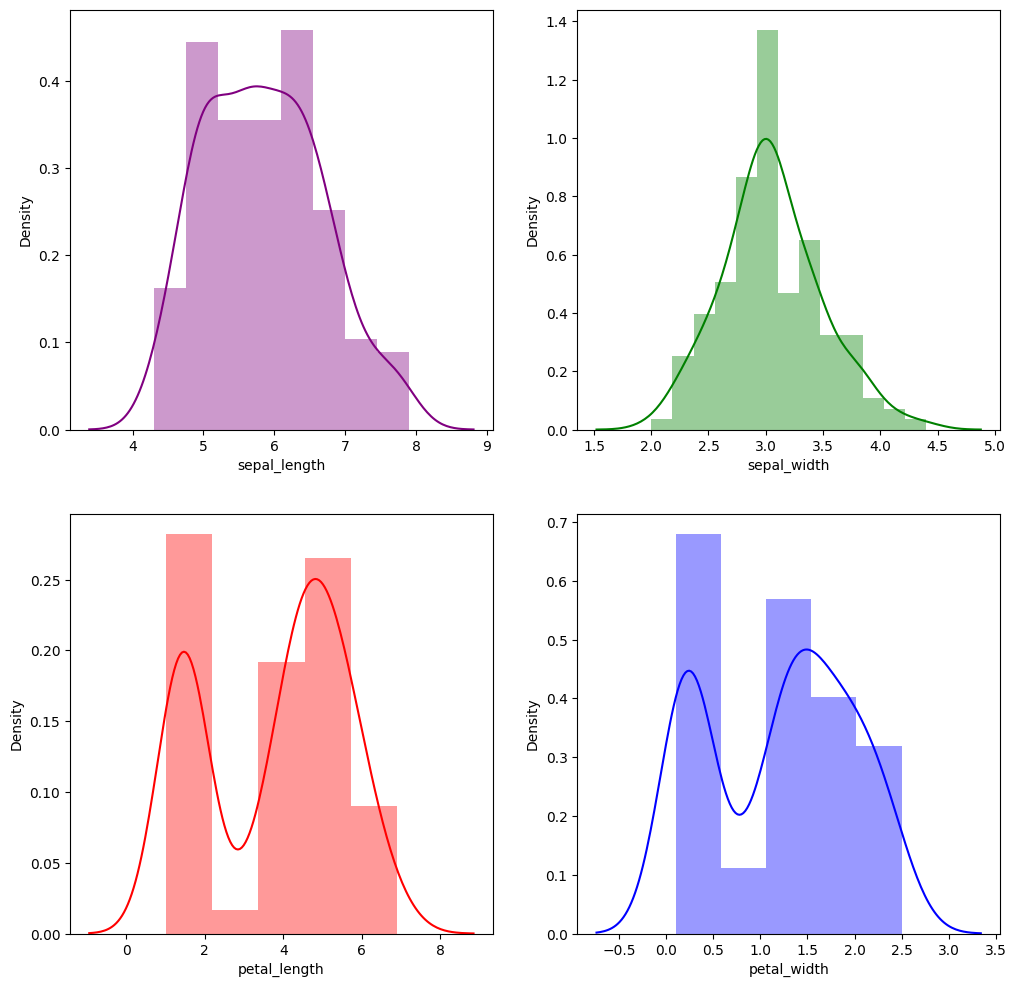

In [82]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.distplot(df['sepal_length'],color='Purple')
plt.subplot(2,2,2)
sns.distplot(df['sepal_width'],color='green')
plt.subplot(2,2,3)
sns.distplot(df['petal_length'],color='red')
plt.subplot(2,2,4)
sns.distplot(df['petal_width'],color= 'blue')


Sepal Length is Normal Distributed and Constant between 5 to 7 So we will apply min-max scaler
//
Sepal Width is Normally Distributed and Highly peaked
//
Petal_length and Petal_width is bimodal distributed and skewed so we can apply log transformation

Text(0.5, 1.0, 'Average Sepal-length for Each Flower Species')

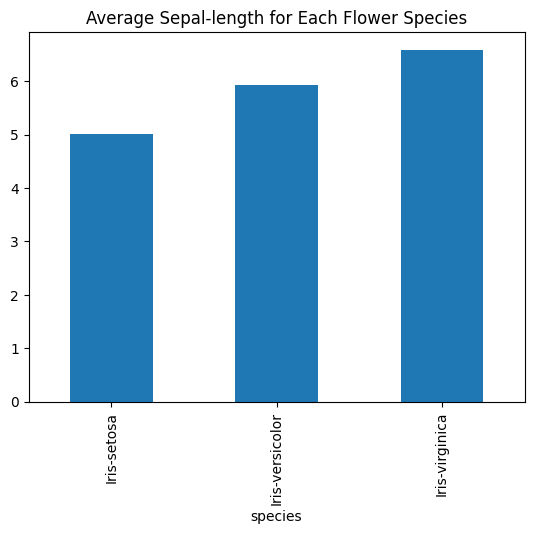

In [83]:
# Average Sepal_Length for Each Flowers

df.groupby(['species'])['sepal_length'].mean().plot(kind='bar')
plt.title('Average Sepal-length for Each Flower Species')


Text(0.5, 1.0, 'Average Sepal_width for Each Flower Species')

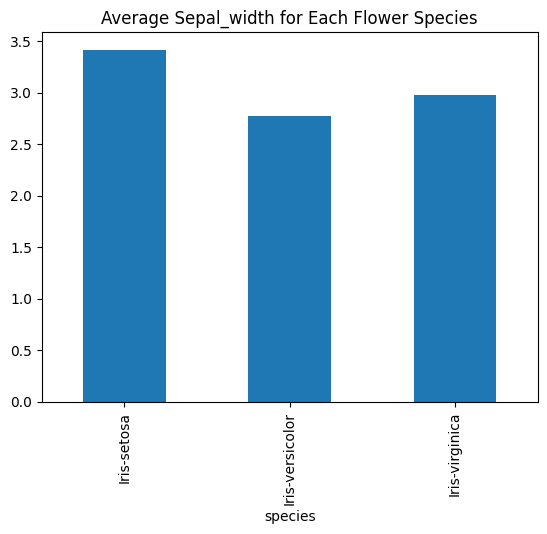

In [84]:
df.groupby(['species'])['sepal_width'].mean().plot(kind='bar')
plt.title('Average Sepal_width for Each Flower Species')

<Axes: xlabel='species'>

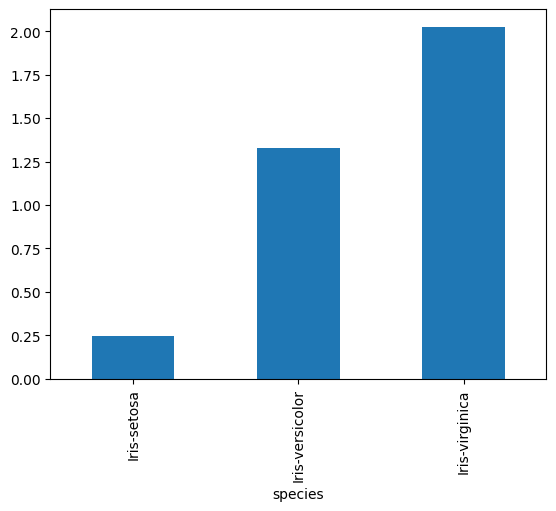

In [85]:
df.groupby(['species'])['petal_width'].mean().plot(kind='bar')

<Axes: xlabel='species'>

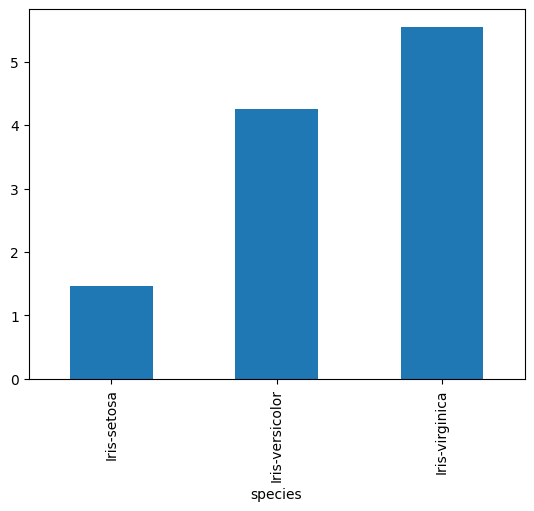

In [86]:
df.groupby(['species'])['petal_length'].mean().plot(kind='bar')

In [87]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
df.iloc[:,0:4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [89]:
# Dividing the Data into Independent and Dependent variable

X = df.iloc[:,0:4]
X
y = df['species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [90]:
from sklearn.preprocessing import  LabelEncoder

y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(C=12)
Lr.fit(X_train,y_train)

LogisticRegression(C=12)

In [101]:
y_pred = Lr.predict(X_test)

In [102]:
accuracy_score(y_train,Lr.predict(X_train))

0.9821428571428571

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



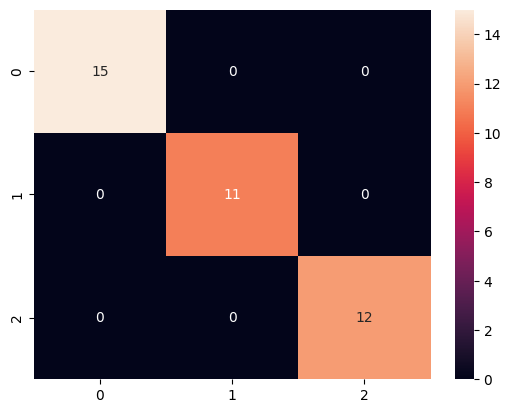

In [103]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
print(classification_report(y_test,y_pred))


In [104]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(Lr,X,y,cv = 10)
score
np.mean(score)


0.9800000000000001

In [97]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor


# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

Dc = DecisionTreeClassifier()
Dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
y_pred_dc = Dc.predict(X_test)

accuracy_score(y_test,y_pred_dc)

1.0

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



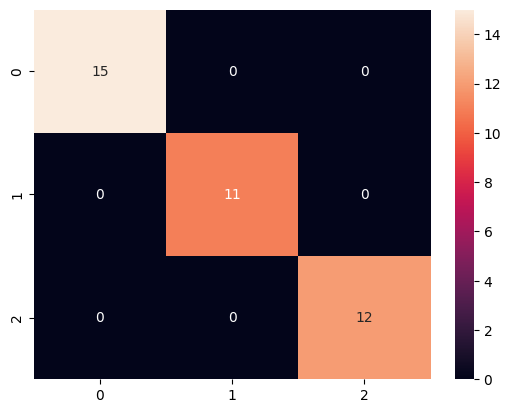

In [109]:
print(accuracy_score(y_test,y_pred_dc))
sns.heatmap(confusion_matrix(y_test,y_pred_dc),annot=True)
print(classification_report(y_test,y_pred_dc))

In [110]:
score = cross_val_score(Dc,X,y,cv = 10)
score
np.mean(score)

0.9533333333333334

In [111]:
import pickle

pickle.dump(Dc,open('Decision_Tree.pkl','wb'))

In [113]:
model = pickle.load(open("Decision_Tree.pkl",'rb'))

In [115]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])